# Introduction

Do higher film budgets lead to more box office revenue?
Data source : [the-numbers.com](https://www.the-numbers.com/movie/budgets)  

<img src=https://i.imgur.com/Hjho3XV.jpeg>

# Import Statements

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings

In [90]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# Notebook Presentation

In [91]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [92]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

In [93]:
data.shape

(5391, 6)

In [94]:
data.isna().any()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [95]:
data.duplicated().sum()

0

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [97]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [98]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


### Data Type Conversions

In [99]:
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$',"")

data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace(',',"")

data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)
data.USD_Production_Budget

0          110000
1          385907
2          200000
3          100000
4          245000
          ...    
5386     15000000
5387    160000000
5388    175000000
5389     50000000
5390     20000000
Name: USD_Production_Budget, Length: 5391, dtype: int64

In [100]:
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace('$',"")

data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace(',',"")

data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)
data.USD_Domestic_Gross

0       10000000
1              0
2        8000000
3        3000000
4       11000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Domestic_Gross, Length: 5391, dtype: int64

In [101]:
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace('$',"")

data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace(',',"")

data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)
data.USD_Worldwide_Gross

0       11000000
1              0
2        8000000
3        3000000
4       22000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Worldwide_Gross, Length: 5391, dtype: int64

In [102]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [103]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.Release_Date

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]

### Descriptive Statistics

In [104]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [105]:
data[data.USD_Worldwide_Gross==2783918982.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

In [106]:
len(data[data.USD_Domestic_Gross==0])

512

How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [107]:
len(data[data.USD_Worldwide_Gross==0])

357

### Filtering on Multiple Conditions

In [108]:
zero_us_success_outside = data.loc[(data.USD_Domestic_Gross==0)& (data.USD_Worldwide_Gross!=0)]
zero_us_success_outside

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [109]:
data.query('USD_Domestic_Gross==0 and USD_Worldwide_Gross!=0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

In [110]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [111]:
future_releases = data[data.Release_Date>=scrape_date]
future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [112]:
data_clean = data.drop(future_releases.index)
data_clean.shape

(5384, 6)

In [113]:
data.shape

(5391, 6)

### Films that Lost Money

Percentage of films where the production costs exceeded the worldwide gross revenue? 

In [114]:
round(len(data_clean.query('USD_Worldwide_Gross<USD_Production_Budget'))/len(data_clean)*100,2)

37.28

# Bubble Charts

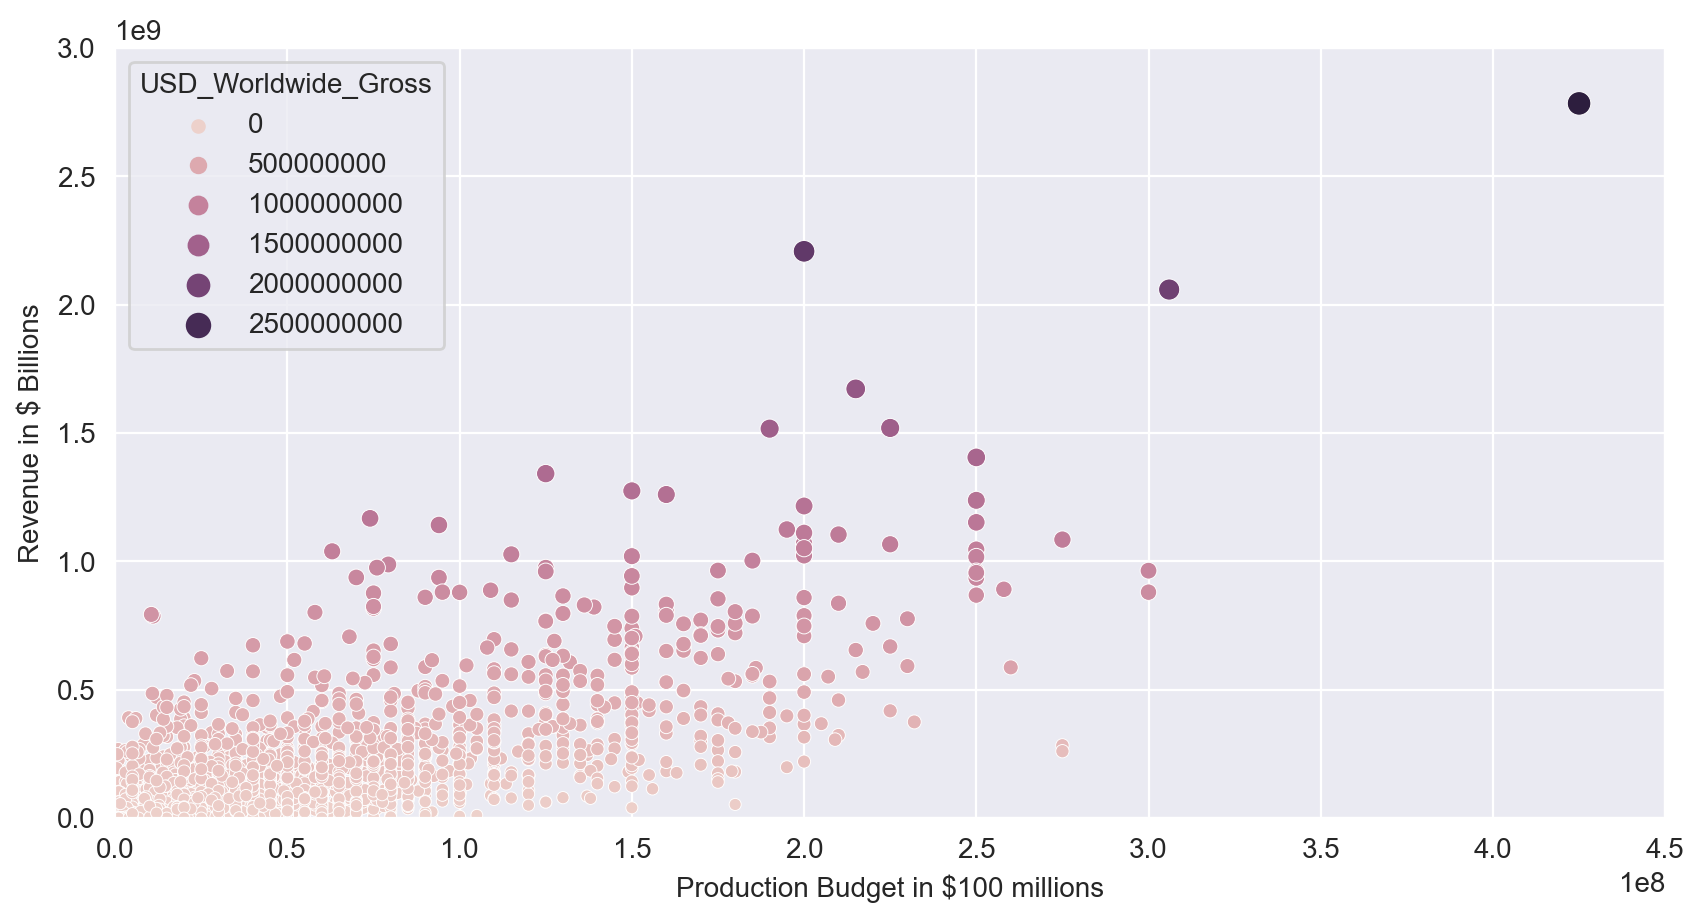

In [115]:
plt.figure(figsize=(10,5),dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,x='USD_Production_Budget',y='USD_Worldwide_Gross',hue='USD_Worldwide_Gross',size='USD_Worldwide_Gross')
    ax.set(xlim=(0,450000000),ylim=(0,3000000000),
           xlabel = 'Production Budget in $100 millions',
           ylabel = 'Revenue in $ Billions')
    plt.show()

### Plotting Movie Releases over Time


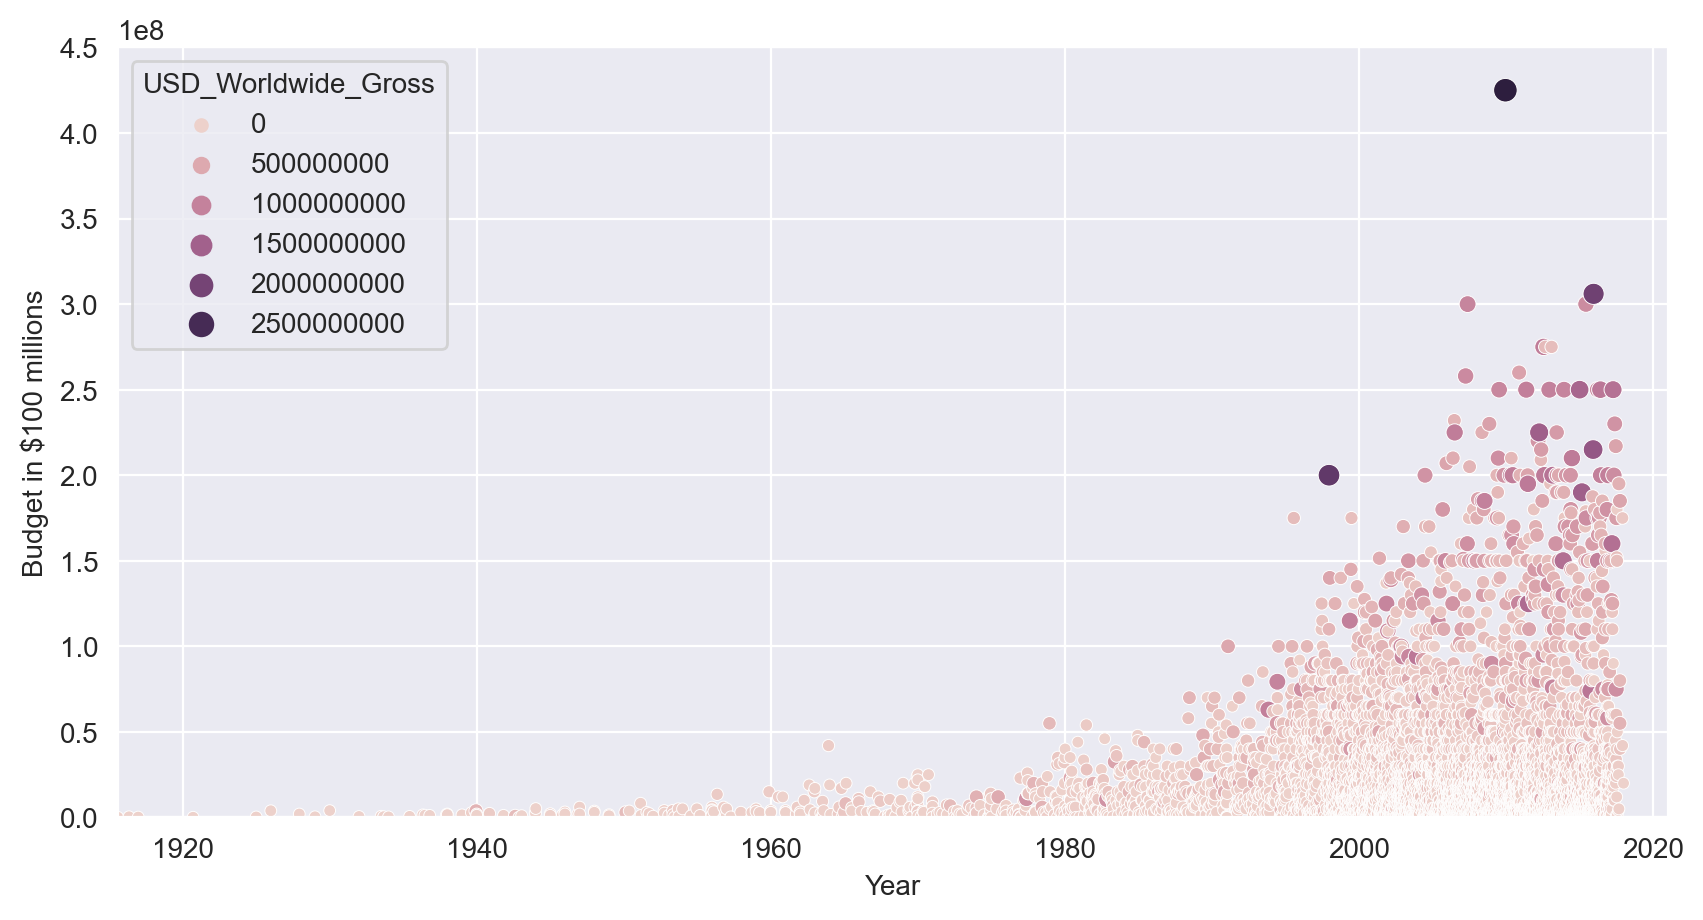

In [116]:
plt.figure(figsize=(10,5),dpi=200)
with sns.axes_style('darkgrid'):
    ax1 = sns.scatterplot(data=data_clean,x='Release_Date',y='USD_Production_Budget',hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross')
    ax1.set(xlim=(data.Release_Date.min(),data.Release_Date.max()),
           ylim=(0,450000000),
           xlabel='Year',
           ylabel='Budget in $100 millions')
    plt.show()

# Converting Years to Decades

In [117]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
dt_index.year

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [118]:
data_clean['Decade'] = dt_index.year//10*10

In [119]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separating the old (before 1969) and new (1970s onwards) Films

In [120]:
old_films = data_clean[data_clean.Decade<1970]
old_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [121]:
old_films.sort_values('USD_Production_Budget',ascending=False)[:3]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960


In [122]:
new_films = data_clean[data_clean.Decade>=1970]
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970


# Seaborn Regression Plots

Scatter plot and linear regression line against the 'new_films'

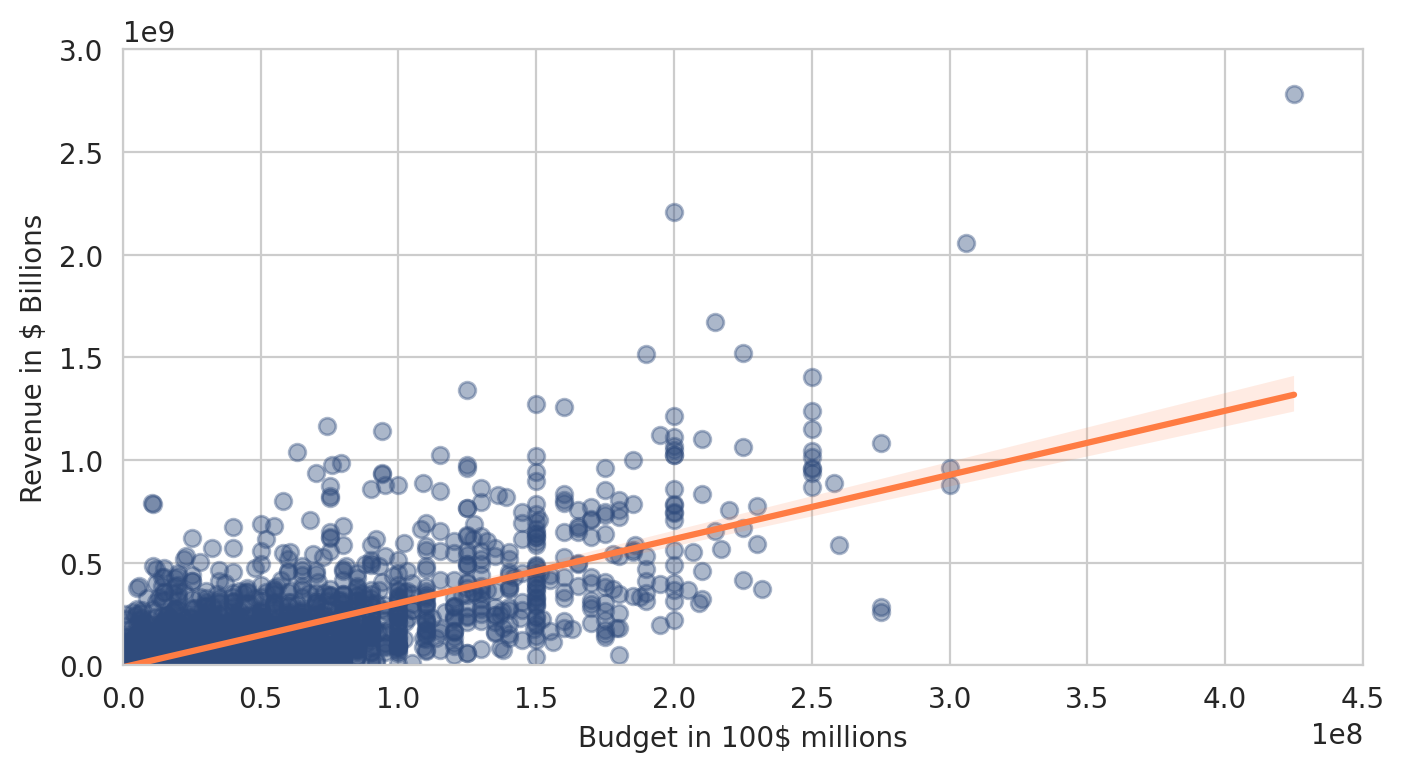

In [123]:
plt.figure(figsize=(8,4),dpi=200)
with sns.axes_style('whitegrid'):
    ax3 = sns.regplot(data=new_films,x='USD_Production_Budget',y='USD_Worldwide_Gross',
               scatter_kws={'alpha':0.4},
               line_kws={'color':'#ff7c43'},
                     color='#2f4b7c')
    ax3.set(xlim=(0,450000000),
           ylim=(0,3000000000),
           xlabel='Budget in 100$ millions',
           ylabel='Revenue in $ Billions')
    

# Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [124]:
regression = LinearRegression()

In [125]:
X = pd.DataFrame(old_films,columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films,columns=['USD_Worldwide_Gross'])

Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [126]:
regression.fit(X,y)

LinearRegression()

In [127]:
regression.intercept_

array([22821538.63508039])

In [128]:
regression.coef_

array([[1.64771314]])

In [129]:
regression.score(X,y)

0.02937258620576877

29% is a low r-squared value

# Prediction

In [130]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget 
# revenue= intercept+slope*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a ${budget} film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350000000 film is around $600000000.0.
